In [18]:
#Description: this program uses the Stochastic relative strength index in python to determine if an asset is overbought or oversold

In [19]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('NVDA(2).csv')
df =df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-05-23,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400
2019-05-24,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400
2019-05-28,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600
2019-05-29,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000
2019-05-30,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000
...,...,...,...,...,...,...,...
2024-05-17,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100
2024-05-20,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400
2024-05-21,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600
2024-05-22,2024-05-22,954.590027,960.200012,932.489990,949.500000,949.500000,53725900


In [21]:
from os import spawnl
#Create a exponential moving average indicator function
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span = period, adjust=False).mean()

In [22]:
import pandas as pd

def EMA(data, period, column):
    return data[column].ewm(span=period, adjust=False).mean()

def StochRSI(data, period=14, smoothK=3, smoothD=3, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()

    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    data['up'] = up
    data['down'] = down
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs(EMA(data, period, column='down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0 / (1.0 + RS))

    StochRSI = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())

    return StochRSI


In [23]:
#Store the stochastic RSI data in a new column
df['StochRSI']=StochRSI(df)

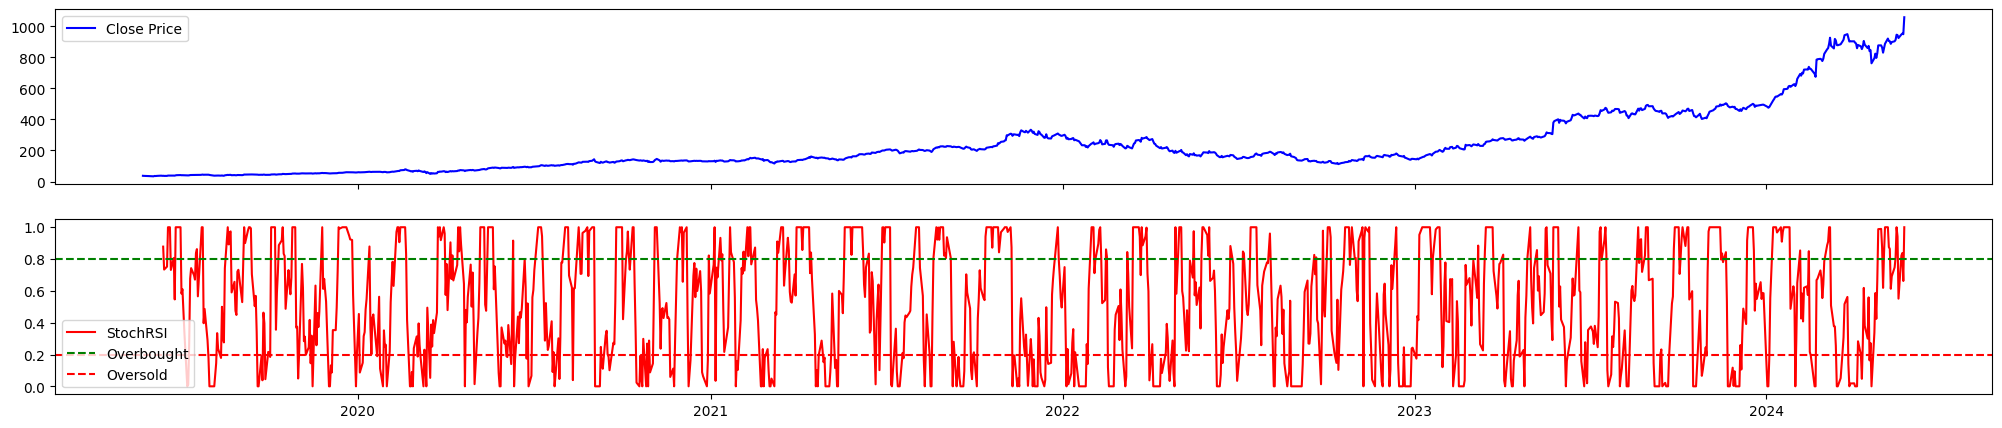

In [30]:
#plot the data
fig , (ax1, ax2)= plt.subplots(2,1, sharex=True, figsize=(25,5))
ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
ax2.plot(df.index, df['StochRSI'], label='StochRSI', color='red')
ax2.axhline(0.8, linestyle='--', color='green', label='Overbought')
ax2.axhline(0.2, linestyle='--', color='red', label='Oversold')
ax1.legend()
ax2.legend()
plt.show()